In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

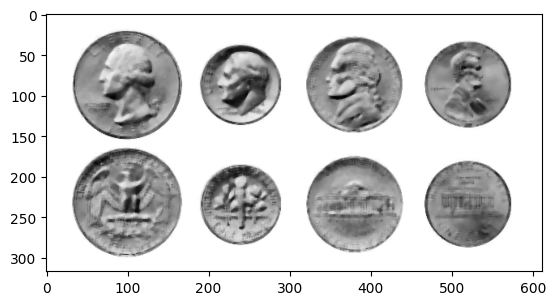

In [2]:
img = cv2.imread("images/coins1.jpg")
img_copy = img.copy()
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray_img, 5)
plt.imshow(gray, cmap='gray')
kernel = np.ones((5,5),np.uint8)

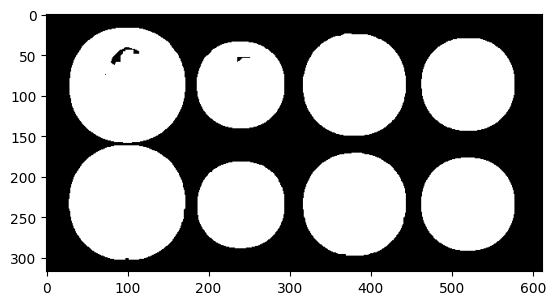

In [3]:
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh = cv2.dilate(thresh, kernel, iterations=2)
plt.imshow(thresh, cmap='gray')

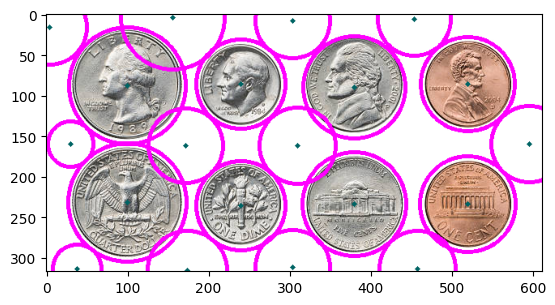

In [4]:
rows = gray.shape[0]
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, minDist=100,
                           param1=200, param2=2,
                           minRadius=20, maxRadius=100)
                           
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img_copy, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_copy, center, radius, (255, 0, 255), 3)

plt.imshow(img_copy)